In [1]:
import matplotlib.pyplot as plt
from subprocess import check_output
import matplotlib as mpl
import numpy as np
import pyvista as pv
from myusefultools import parser
from phydrus.read import read_nod_inf
import pandas as pd

REPO_PATH = check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
plt.style.use(f'{REPO_PATH}/misc/edwin.mplstyle')


## Read HYDRUS-1D results

Using the `phydrus` package. Remember to check the units! 

In [2]:
HYDRUS_NOD_INF = "HYDRUS_RESULTS/Nod_Inf.out"
hydrus_profiles = read_nod_inf("HYDRUS_RESULTS/Nod_Inf.out")

# Remove time zero
del hydrus_profiles[0.0]

hydrus_times_hours = hydrus_profiles.keys()
print("The following times were found \n", hydrus_times_hours)


The following times were found 
 dict_keys([1.0, 3.0, 10.0, 20.0, 30.0, 50.0])


In [3]:
hydrus_profiles[3.0]

,Node,Depth,Head,Moisture,K,C,Flux,Sink,Kappa,v/KsTop,Temp
1,1,0.0,5.000,0.4100,14.590000,0.000000,-3.669000,0.0,-1,-0.251000,20.0
2,2,-1.0,5.749,0.4100,14.590000,0.000000,-3.669000,0.0,-1,-0.251000,20.0
3,3,-2.0,6.497,0.4100,14.590000,0.000000,-3.669000,0.0,-1,-0.251000,20.0
4,4,-3.0,7.246,0.4100,14.590000,0.000000,-3.669000,0.0,-1,-0.251000,20.0
5,5,-4.0,7.994,0.4100,14.590000,0.000000,-3.669000,0.0,-1,-0.251000,20.0
...,...,...,...,...,...,...,...,...,...,...,...
597,597,-596.0,-46.294,0.0943,0.000503,0.001013,-0.000503,0.0,-1,-0.000034,20.0
598,598,-597.0,-46.294,0.0943,0.000503,0.001013,-0.000503,0.0,-1,-0.000034,20.0
599,599,-598.0,-46.294,0.0943,0.000503,0.001013,-0.000503,0.0,-1,-0.000034,20.0
600,600,-599.0,-46.294,0.0943,0.000503,0.001013,-0.000503,0.0,-1,-0.000034,20.0


In [4]:
## Sample colors for plot
cmap = mpl.cm.tab20c
colors = cmap(np.linspace(0, 1, len(hydrus_times_hours)))

## Read OpenFOAM results

Using `pyvista` to generate profiles by sampling over line. Remember to check the printed times! 

In [5]:
OPENFOAM_FOLDER = "THREELAYERS"
of_vtk_files = parser.getVTKList(f"{OPENFOAM_FOLDER}/VTK")
of_times_seconds = parser.getTimeList(OPENFOAM_FOLDER)
of_times_hours = np.array([float(t)/3600 for t in of_times_seconds])
print("The following times were found \n", of_times_hours)

The following times were found 
 [ 1.0003025   2.00004889  2.99952222  3.99952222  4.99952222  5.99952222
  6.99952222  7.99952222  8.99952222  9.99952222 10.99952222 11.99952222
 12.99952222 13.99952222 14.99952222 15.99952222 16.99952222 17.99952222
 18.99952222 19.99952222 20.99952222 21.99952222 22.99952222 23.99952222
 24.99952222 25.99952222 26.99952222 27.99952222 28.99952222 29.99952222
 30.99952222 31.99952222 32.99952222 33.99952222 34.99952222 35.99952222
 36.99952222 37.99952222 38.99952222 39.99952222 40.99952222 41.99952222
 42.99952222 43.99952222 44.99952222 45.99952222 46.99952222 47.99952222
 48.99952222 49.99952222 50.99952222 51.99952222 52.99952222 53.99952222
 54.99952222 55.99952222 56.99952222 57.99952222 58.99952222 59.99952222]


In [6]:
of_selected_vtk_files = dict()

for vtk, time_s, time_hr in zip(of_vtk_files, of_times_seconds, of_times_hours):
    if round(float(time_hr)) in hydrus_times_hours:
        print(vtk, time_s, time_hr, "*")
        of_selected_vtk_files[round(float(time_hr))] = vtk
    else:
        print(vtk, time_s, time_hr)

THREELAYERS_763.vtk 3601.089 1.0003025 *
THREELAYERS_1634.vtk 7200.176 2.000048888888889
THREELAYERS_2372.vtk 10798.280 2.999522222222222 *
THREELAYERS_3092.vtk 14398.280 3.999522222222222
THREELAYERS_3812.vtk 17998.280 4.999522222222222
THREELAYERS_4532.vtk 21598.280 5.999522222222222
THREELAYERS_5252.vtk 25198.280 6.999522222222222
THREELAYERS_5972.vtk 28798.280 7.999522222222222
THREELAYERS_6692.vtk 32398.280 8.999522222222222
THREELAYERS_7412.vtk 35998.280 9.999522222222222 *
THREELAYERS_8132.vtk 39598.280 10.999522222222222
THREELAYERS_8852.vtk 43198.280 11.999522222222222
THREELAYERS_9572.vtk 46798.280 12.999522222222222
THREELAYERS_10292.vtk 50398.280 13.999522222222222
THREELAYERS_11012.vtk 53998.280 14.999522222222222
THREELAYERS_11732.vtk 57598.280 15.999522222222222
THREELAYERS_12452.vtk 61198.280 16.99952222222222
THREELAYERS_13172.vtk 64798.280 17.99952222222222
THREELAYERS_13892.vtk 68398.280 18.99952222222222
THREELAYERS_14612.vtk 71998.280 19.99952222222222 *
THREELAYER

In [7]:
len(hydrus_profiles) == len(of_selected_vtk_files) == len(colors)

True

In [8]:
COLUMN_LENGTH = 6.00 # m
# POROSITY = 0.41

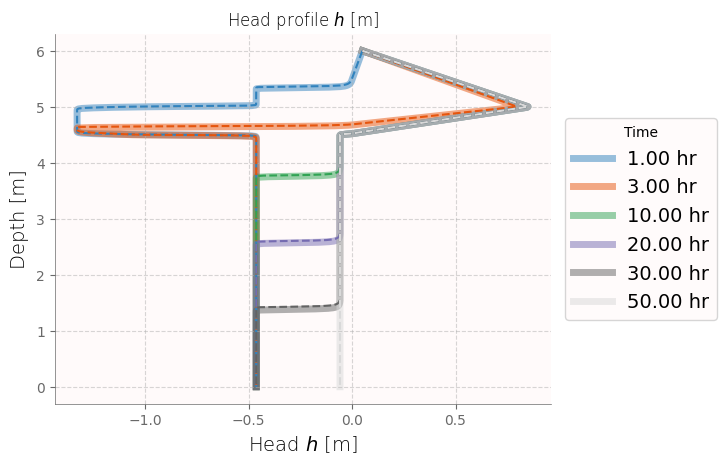

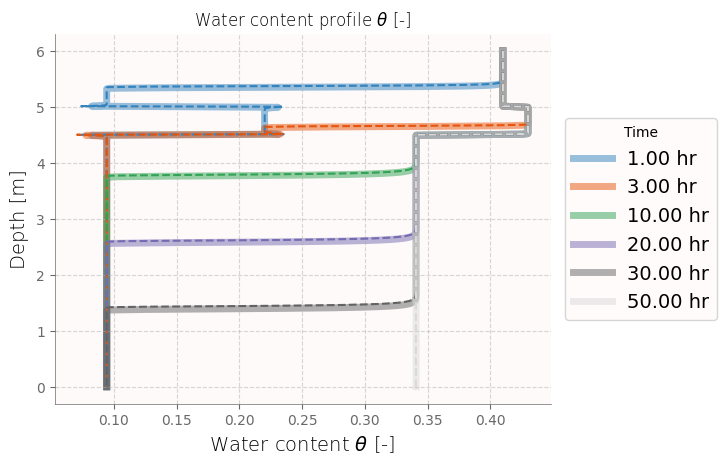

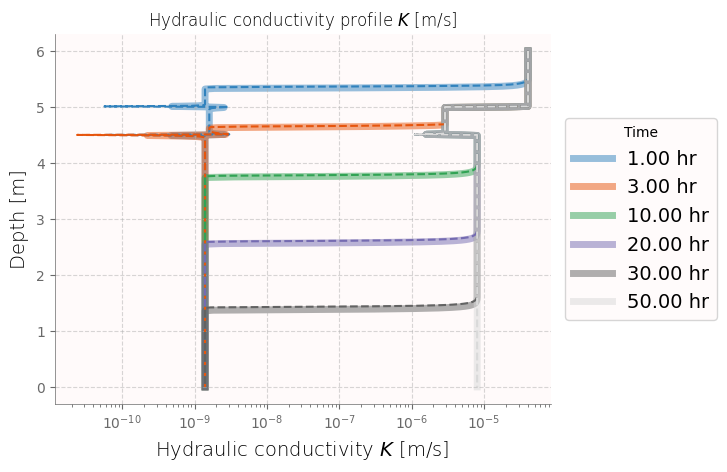

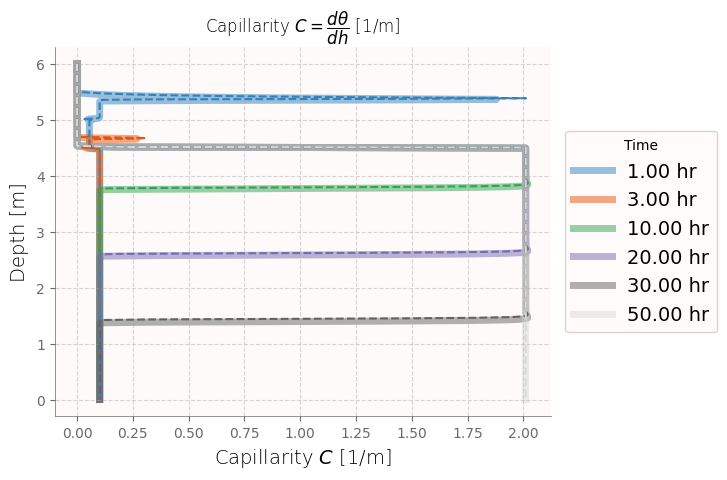

In [9]:
fig_head ,ax_head = plt.subplots()
fig_theta ,ax_theta = plt.subplots()
fig_K ,ax_K = plt.subplots()
fig_capil ,ax_capil = plt.subplots()

of_pandas_summary = dict()

plot_kwargs = {
    "openfoam": dict(lw=5, alpha=0.5, zorder=1),
    "hydrus1d": dict(lw=1.5, ls="dashed", zorder=2)
}

for (time_hydrus, hydrus_profile), (time_of, of_vtk), color in zip(hydrus_profiles.items(), of_selected_vtk_files.items(), colors):

    mesh = pv.read(f"{OPENFOAM_FOLDER}/VTK/" + of_vtk)
    line = pv.Line(
    a:=[0, 0, mesh.bounds[5]],
    b:=[0, 0, mesh.bounds[2]])
    
    sample = mesh.sample_over_line(a,b)

    # Head ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ##  OpenFOAM results    
    ax_head.plot(
        sample["h"],                #<- Head  (m)
        sample.points[:, 2],        #<- Depth (m)
        label=f"{time_of:.2f} hr",
        c=color, 
        **plot_kwargs["openfoam"]
    )

    ##  Hydrus1D results    
    ax_head.plot(
        hydrus_profile["Head"]/100,  #<- Head (m)
        COLUMN_LENGTH + hydrus_profile["Depth"]/100, #<- Depth (m)
        c=color,
        **plot_kwargs["hydrus1d"]
    ) 

    # Water content ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ##  OpenFOAM results    
    ax_theta.plot(
        sample["Sw"] * sample["porosity"],      #<- theta = Sw * porosity
        sample.points[:, 2],          #<- Depth (m)
        label=f"{time_of:.2f} hr",
        c=color, 
        **plot_kwargs["openfoam"]
    )

    ##  Hydrus1D results    
    ax_theta.plot(
        hydrus_profile["Moisture"],  #<- Theta (m)
        COLUMN_LENGTH + hydrus_profile["Depth"]/100, #<- Depth (m)
        c=color,
        **plot_kwargs["hydrus1d"]
    )

    # Hydraulic conduct ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ##  OpenFOAM results    
    ax_K.plot(
        sample["hydraulicCond"],      #<- K (m/s)
        sample.points[:, 2],          #<- Depth (m)
        label=f"{time_of:.2f} hr",
        c=color,
        **plot_kwargs["openfoam"]
    )

    ##  Hydrus1D results    
    ax_K.plot(
        hydrus_profile["K"]/(100*3600),  #<- K (m/s)
        COLUMN_LENGTH + hydrus_profile["Depth"]/100, #<- Depth (m)
        c=color,
        **plot_kwargs["hydrus1d"]
    )

    # Capillarity ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ##  OpenFOAM results    
    ax_capil.plot(
        sample["capillarity"] * sample["porosity"],   #<- C(h) (1/m)
        sample.points[:, 2],                #<- Depth (m)
        label=f"{time_of:.2f} hr",
        c=color,
        **plot_kwargs["openfoam"]
    )

    ##  Hydrus1D results    
    ax_capil.plot(
        hydrus_profile["C"] * 100,  #<- C(h) (m/s)
        COLUMN_LENGTH + hydrus_profile["Depth"]/100, #<- Depth (m)
        c=color,
        **plot_kwargs["hydrus1d"]
    )

    of_pandas_summary[time_of] = pd.DataFrame(
        {
            'z': sample.points[:, 2],
            'h': sample['h'],
            'theta': sample["Sw"] * sample["porosity"], 
            'hydraulic_cond': sample['hydraulicCond'],
            'capillarity': sample['capillarity'] * sample['porosity']
        }
    )

for ax in [ax_head, ax_theta, ax_K, ax_capil]:
    ax.grid(True, ls='dashed', alpha=0.5)
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], title="Time")
    ax.set_ylabel("Depth [m]")

ax_head.set_title(r"Head profile $h$ [m]")
ax_head.set_xlabel(r"Head $h$ [m]")

ax_theta.set_title(r"Water content profile $\theta$ [-]")
ax_theta.set_xlabel(r"Water content $\theta$ [-]")

ax_K.set_title(r"Hydraulic conductivity profile $K$ [m/s]")
ax_K.set_xlabel(r"Hydraulic conductivity $K$ [m/s]")
ax_K.set_xscale('log')

ax_capil.set_title(r"Capillarity $C = \dfrac{d\theta}{dh}$ [1/m]")
ax_capil.set_xlabel(r"Capillarity $C$ [1/m]")

plt.show()


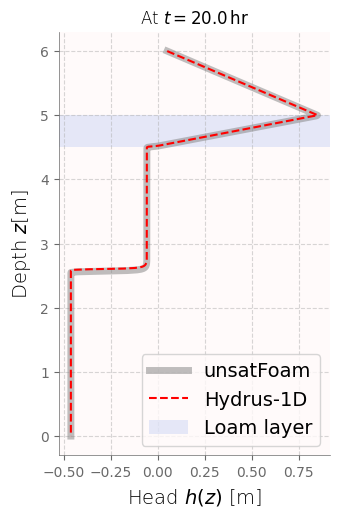

In [10]:
TIME = 20

fig,ax = plt.subplots(figsize=[3.5,5.5])

# Head ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##  OpenFOAM results    
ax.plot(
    of_pandas_summary[TIME]["h"],        #<- Head  (m)
    of_pandas_summary[TIME]["z"],        #<- Depth (m)
    label=f"unsatFoam",
    c='grey', lw=5, alpha=0.5, zorder=2
)

##  Hydrus1D results    
ax.plot(
    hydrus_profiles[TIME]["Head"]/100,              #<- Head (m)
    COLUMN_LENGTH + hydrus_profile["Depth"]/100,    #<- Depth (m)
    c='r', lw=1.5, ls='dashed', zorder=3, label="Hydrus-1D"
    ) 

ax.grid(True, ls='dashed', alpha=0.5)
ax.set_ylabel("Depth $z$[m]")
ax.set_xlabel(r"Head $h(z)$ [m]")
ax.axhspan(4.5, 5.0, alpha=0.1, zorder=1, label="Loam layer", facecolor='xkcd:blue')
ax.set_title(rf"At $t={TIME:.1f} \, {{\rm hr}}$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()